<a href="https://colab.research.google.com/github/ajay4198/Startup-Company-Prediction-/blob/main/Prediction_of_50startup_company_in_USA_using_regression_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Objective</h1>
To predict the profit made by a startup on the basis of expenses incurred and the state where they operate
<h1>Tasks</h1>
* Validate all the assumptions
* Compute all the regression evaluation metrics
* Comment on the best evaluation metrics 
for this problem




In [ ]:
#importing the libraries 
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/50_Startups.csv')

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
len(df)

50

In [ ]:
df.shape

(50, 5)

<h1>Checking the columns which is linearly distributed with profit</h1>

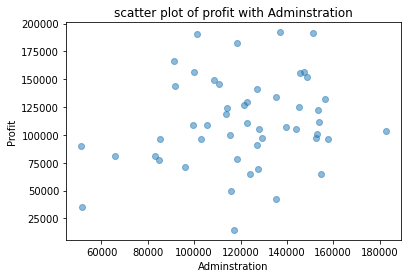

In [ ]:
# scatter plot adminstration with profit 

plt.scatter(df['Administration'],df['Profit'],alpha=0.5)
plt.title('scatter plot of profit with Adminstration')
plt.xlabel('Adminstration')
plt.ylabel('Profit')
plt.show()

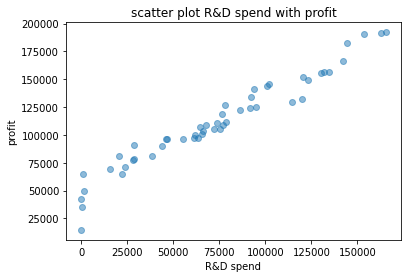

In [ ]:
# scatter plot R&D spend with profit

plt.scatter(df['R&D Spend'],df['Profit'],alpha=0.5)
plt.title('scatter plot R&D spend with profit')
plt.xlabel('R&D spend')
plt.ylabel('profit')
plt.show()

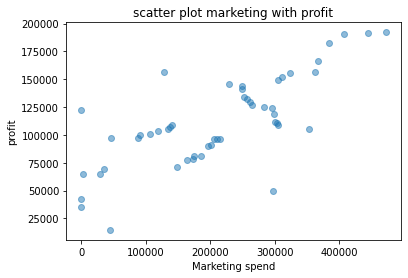

In [ ]:
# scatter plot marketing spend with profit

plt.scatter(df['Marketing Spend'],df['Profit'],alpha=0.5)
plt.title('scatter plot marketing with profit')
plt.xlabel('Marketing spend')
plt.ylabel('profit')
plt.show()

Text(0, 0.5, 'profit')

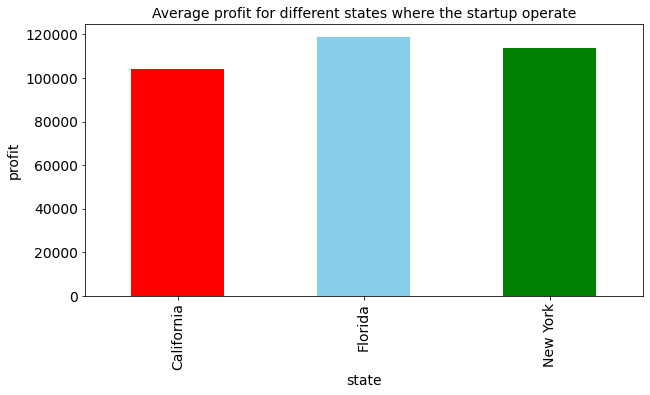

In [ ]:
state=df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize=(10,5),
    fontsize=14,
    color=['red','skyblue','green']
    )
state.set_title('Average profit for different states where the startup operate',fontsize=14)
state.set_xlabel('state',fontsize=14)
state.set_ylabel('profit',fontsize=14)


In [ ]:
# check the values in state column
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
# create a dummy variables for the categeorical variable State

df['NewYork_State']=np.where(df['State']=='New York',1,0)
df['California_florida']=np.where(df['State']=='California',1,0)
df['Florida_state']=np.where(df['State']=='Florida',1,0)

df.drop(columns=['State'],axis=1,inplace=True)



In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_florida,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable='Profit'
df[dependent_variable].values

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
# Create a list of independent variables

independent_variables=list(set(df.columns.tolist())-{dependent_variable})
independent_variables

['California_florida',
 'Marketing Spend',
 'NewYork_State',
 'R&D Spend',
 'Florida_state',
 'Administration']

In [ ]:
# create the data of independent variables
X=df[independent_variables].values

# create the dependent_variable data
y=df[dependent_variable].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
# Splitting the dataset inot training set and testing set

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=0)


In [ ]:
# transforming data using minmaxscaler()

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.45494286, 0.        , 0.33561668, 1.        ,
        0.48655174],
       [0.        , 0.43561799, 1.        , 0.2782839 , 0.        ,
        0.3173015 ],
       [0.        , 0.28413435, 0.        , 0.45557444, 1.        ,
        0.87258866],
       [1.        , 0.44680961, 0.        , 0.2807759 , 0.        ,
        1.        ],
       [0.        , 0.62511553, 0.        , 0.55488118, 1.        ,
        0.59103645],
       [0.        , 0.68649342, 0.        , 0.7880179 , 1.        ,
        0.88568959],
       [0.        , 0.54370828, 0.        , 0.72539353, 1.        ,
        0.98922572],
       [0.        , 0.0040356 , 1.        , 0.0060492 , 0.        ,
        0.6847981 ],
       [0.        , 0.        , 1.        , 0.00327821, 0.        ,
        0.00432296],
       [0.        , 0.22709197, 1.        , 0.39676926, 0.        ,
        0.95618996]])

In [ ]:
# fitting multiple linear regression to the training set
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting the test set results
y_pred=regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794935

In [ ]:
r2_score(y_test,y_pred)

0.9347068473282426